In [1]:
# knn_class_vis.ipynb
# 18 Jun 2025
# Basic KNN Classification with Visualization

Accuracy: 0.80


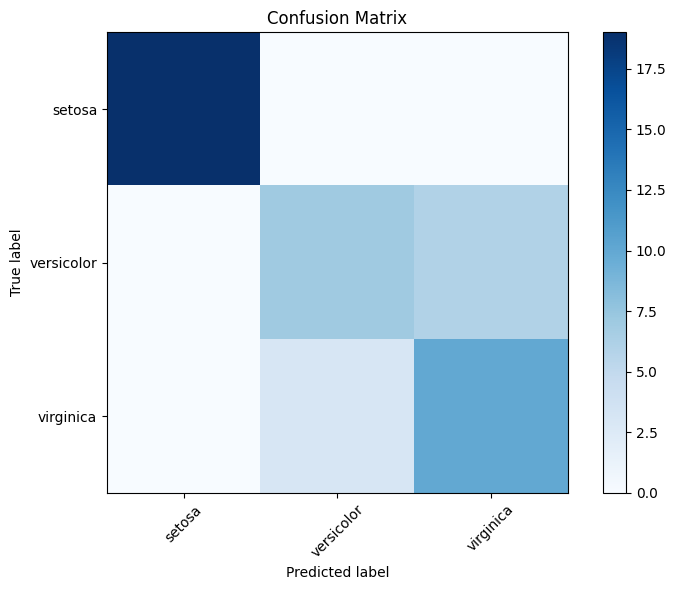

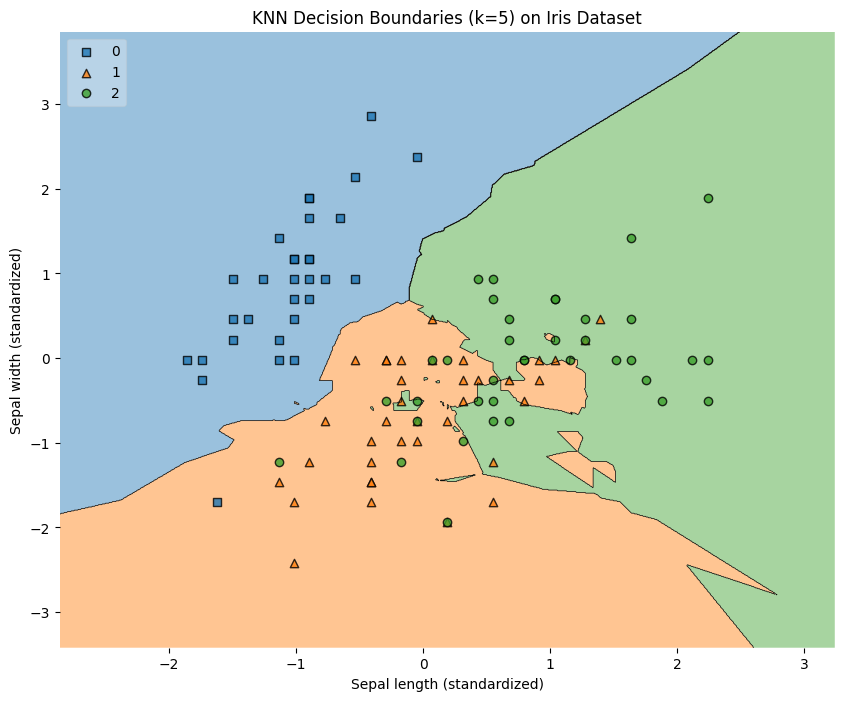

In [3]:
"""
KNN Classification on Iris Dataset
This program demonstrates:
1. Loading and exploring the Iris dataset
2. Splitting data into training and test sets
3. Implementing KNN classification
4. Visualizing decision boundaries
5. Evaluating model performance
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only first two features for visualization
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Plot decision boundaries (using only first two features)
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, clf=knn, legend=2)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('KNN Decision Boundaries (k=5) on Iris Dataset')
plt.show()